In [42]:
import pandas as pd 
import numpy as np

def get_csv(path):
    df = pd.read_csv(path)
    return df

def test_df(orders_df, prior_df):
    '''
    input: 
       takes in the "orders" df to identifying those specific 75,000 test users
       takes in the "prior" df to connect those test users to their itemized order

    returns: 
        df of 75,000 users and their itemized last order
        Only 2 columns not included: 1 for a duplicate column and 1 the label or train or test
    '''
    order_test = orders[orders['eval_set'] == "test"].copy()
    order_test['prev'] = order_test['order_number'] - 1
    order_test = order_test[['user_id', 'prev']]

    merged_test = order_test.merge(orders, how='inner', left_on=["user_id", "prev"], right_on=["user_id","order_number"])
    merged_test[['user_id', 'prev', 'order_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]

    test = pd.merge(merged_test, prior_df, on="order_id") 
    test = test[['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered']]

    test_target = test.pop('reordered')
    
    return test, test_target

def train_df(orders_df, train_df):
    '''
    input: 
        takes in the "train" df to identify my training users
        takes in "orders" df to connect my train users to their most recent itemized orders

    returns: 
        df of 131,209 users and their most recent itemized orders
        Only 2 columns not included: 1 for a duplicate column and 1 the label or train or test
    '''
    train = pd.merge(order_train, orders, how='left')
    train = train[['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered']]
    train_target = train.pop('reordered')
    
    return train, train_target 

In [43]:
#create all data frames
aisle = get_csv('./instacart_data/aisles.csv')
depart = get_csv('./instacart_data/departments.csv')
products = get_csv('./instacart_data/products.csv')
order_train = get_csv('./instacart_data/order_products__train.csv')
order_prior = get_csv('./instacart_data/order_products__prior.csv')
orders = get_csv('./instacart_data/orders.csv')

X_test, y_test = test_df(orders, order_prior)
X_train, y_train = train_df(orders, order_train)

In [44]:
#look at testing data
X_test

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,3,1402502,12,1,15,15.0,39190,1
1,3,1402502,12,1,15,15.0,18599,2
2,3,1402502,12,1,15,15.0,23650,3
3,3,1402502,12,1,15,15.0,21903,4
4,3,1402502,12,1,15,15.0,47766,5
...,...,...,...,...,...,...,...,...
780795,206208,1882108,49,1,22,7.0,2643,13
780796,206208,1882108,49,1,22,7.0,21405,14
780797,206208,1882108,49,1,22,7.0,7632,15
780798,206208,1882108,49,1,22,7.0,1942,16


In [45]:
#look at training data
X_train

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,112108,1,4,4,10,9.0,49302,1
1,112108,1,4,4,10,9.0,11109,2
2,112108,1,4,4,10,9.0,10246,3
3,112108,1,4,4,10,9.0,49683,4
4,112108,1,4,4,10,9.0,43633,5
...,...,...,...,...,...,...,...,...
1384612,169679,3421063,30,0,10,4.0,14233,3
1384613,169679,3421063,30,0,10,4.0,35548,4
1384614,139822,3421070,15,6,10,8.0,35951,1
1384615,139822,3421070,15,6,10,8.0,16953,2


In [46]:
#want to make sure that those in test df are not also in train
set(X_train['user_id']) == set(X_test['user_id'])

False

In [47]:
y_train

0          1
1          1
2          0
3          0
4          1
          ..
1384612    1
1384613    1
1384614    1
1384615    1
1384616    1
Name: reordered, Length: 1384617, dtype: int64

In [48]:
y_test

0         1
1         1
2         1
3         1
4         1
         ..
780795    1
780796    0
780797    0
780798    0
780799    1
Name: reordered, Length: 780800, dtype: int64

In [24]:
# saved to csv with old variable names
# DO NOT RERUN
# full_test.to_csv('test.csv')
# test_target.to_csv('test_target.csv')
# full_train.to_csv('train.csv')
# train_target.to_csv('train_target.csv')

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   user_id                 1384617 non-null  int64  
 1   order_id                1384617 non-null  int64  
 2   order_number            1384617 non-null  int64  
 3   order_dow               1384617 non-null  int64  
 4   order_hour_of_day       1384617 non-null  int64  
 5   days_since_prior_order  1384617 non-null  float64
 6   product_id              1384617 non-null  int64  
 7   add_to_cart_order       1384617 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 95.1 MB


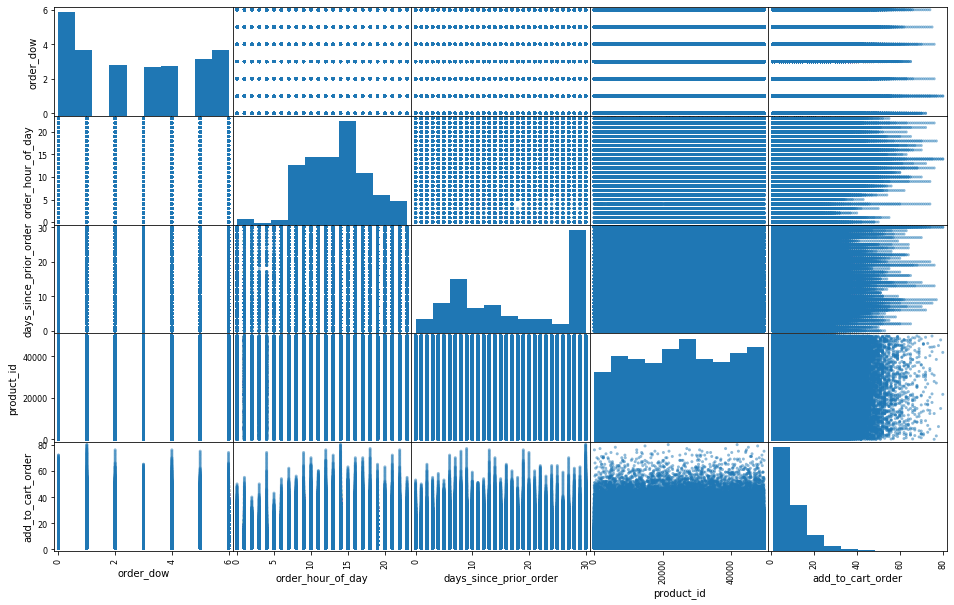

In [31]:
#do not run again!
# pd.plotting.scatter_matrix(full_train[['order_dow', 'order_hour_of_day',
#        'days_since_prior_order', 'product_id', 'add_to_cart_order']], figsize = (16, 10));

# Explores Model 1 decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state = 3)
clf.fit(X_train, y_train)
clf.predict(X_test)
dt_score = clf.score(X_test, y_test)

Decision Tree Score round(0.5704918032786885, 2)


In [61]:
print(f'Decision Tree Score {dt_score:.5}')

Decision Tree Score 0.57049


In [62]:
X_train.columns

Index(['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order'],
      dtype='object')

In [64]:
clf = DecisionTreeClassifier(random_state = 3)
clf.fit(X_train[['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order']], y_train)
clf.predict(X_test[['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order']])
dt_score2 = clf.score(X_test[['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order']], y_test)
print(f'Decision Tree Score with removing labels {dt_score2:.5}')

Decision Tree Score with removing labels 0.55564


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array
        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best

In [67]:
dt_boosting_grid = {'min_samples_split': [5, 10],
                    'max_features': ['auto', 'log2', 'sqrt'],
                    'random_state': [3]}   

best_params, model_best = gridsearch_with_output(DecisionTreeClassifier(), dt_boosting_grid, X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.2s finished



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
min_samples_split    | 10       | [5, 10]
max_features         | log2     | ['auto', 'log2', 'sqrt']
random_state         | 3        | [3]


In [69]:
clf = DecisionTreeClassifier(min_samples_split = 10, max_features = 'log2', random_state = 3)
clf.fit(X_train, y_train)
clf.predict(X_test)
dt_score3 = clf.score(X_test, y_test)
print(f'Decision Tree Score with best from gridsearch {dt_score3:.5}')

Decision Tree Score with best from gridsearch 0.57502


# Explore Random Forests

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
score = rf.score(X_test, y_test)

In [77]:
score

0.6462615266393442

In [ ]:
random_forest_grid = {'max_depth': [3, 5, 7, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4, 8],
                      'min_samples_leaf': [2, 4, 8],
                      'n_estimators': [20, 40, 80, 160, 240],
                      'random_state': [3]}

rf_best_params, rf_best_model = gridsearch_with_output(RandomForestClassifier(), 
                                                       random_forest_grid, 
                                                       X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 105.3min
